# Pipeline de procesamiento de datos numéricos:

Hace referencia al procesamiento que se le debe realizar a los datos previo al modelamiento de proyectos de machine learning.

## Normalización de los datos por __escalamiento lineal__:

Corresponde a reescalar los datos en un rango simplificado de entre -1 y 1, manera que los modelos sean más eficientes.

__*Nota*__: Solo se utiliza cuando los datos tienen una distribución normal o gaussiana.

### Tipos de escalamiento Linear:

- min-max: el proceso de escalado se realiza mediante la siguiente ecuación:
    $$ x_s = \frac{2x-min-max}{max-min} $$ 
    En donde $x_s$ corresponde al dato escalado y x corresponde al dato original del dataset.

- Clipping: el proceso de escalado requiere seleccionar limites inferior y superior del dataset original de manera que los outliers sean colapsados a esos valores limite.
    $$ x_s= \left\{ \begin{array}{lcc}
             x & si & lim_{inf} < x < lim_{sup} \\
             \\ lim_{inf} & si & x < lim_{inf} \\
             \\ lim_{sup} &  si  & x > lim_{sup}
             \end{array}
   \right. $$
    ***Nota***: No es un metodo muy recomendable por que se pierde la fiabilidad de los datos extremos.
   
- z-score: El proceso de escalado se basa directamente en los estadisticos de dispersión como el promedio y la desviación estandar: 
    $$ x_s = \frac{x-\bar{x}}{\sigma} $$

- Winsorrizing: se utiliza el percentil del dato en vez que el dato bruto.
- otros.

### Codigo:
se instalan las librerias en caso de no tenerlas instaladas.

#### Librerias:
Se importan las librerias a utilizar.

In [112]:
# pip install -U scikit-learn

In [113]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


#### Dataframe:
Se agrega el dataframe con el que se va a trabajar, para este caso el dataset de diabetes el cual se compone de 442 registros para 10 variables.

In [114]:
data, target = datasets.load_diabetes(return_X_y=True)

El codigo: `data, target = datasets.load_diabetes(return_X_y=True)` lo que hace es traer los datos al array `data` y los valores de la variable dependiente al array `target`

In [115]:
print(target.shape)
print(data.shape)

(442,)
(442, 10)


de los datos originales `data` se extrae todos los registros de la columna 2 sin hacerle ningun tipo de transformación, y los guardamos en el array `raw` así:

variable["datos a seleccionar", "tipo de transformación", "columna a extraer"]

In [116]:
raw = data[:, None, 2]

#### Escalamiento:

##### Escalamiento Max-Min:

In [117]:
# normalización por Max-Min por formula
max_raw = max(raw)
min_raw = min(raw)
maxmin_formula = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización por Max-Min por formula
from sklearn import preprocessing
maxmin_scaler=preprocessing.MinMaxScaler(feature_range=(-1,1))
maxmin_funcion=maxmin_scaler.fit_transform(raw) 

##### Escalamiento Z-score:

In [118]:
# normalización Z-score por formula
avg = np.mean(raw)
std = np.std(raw)
z_scaled_formula = (raw - avg)/std

# normalización Z-score por funcion scikit-learn
z_sc=preprocessing.StandardScaler()
z_scaled_funcion=z_sc.fit_transform(raw) 

#### Graficado:

Para entender visualmente el escalado que se realizó por los dos metodos se procese a ralizar el histograma para los tres arrays, `raw`, `scaled` y `z_scaled`

Text(0.5, 1.0, 'Z-Score por función')

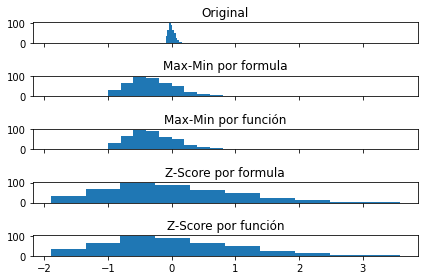

In [119]:
fig, axs = plt.subplots(5, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[0].set_title("Original")
axs[1].hist(maxmin_formula)
axs[1].set_title("Max-Min por formula")
axs[2].hist(maxmin_funcion)
axs[2].set_title("Max-Min por función")
axs[3].hist(z_scaled_formula)
axs[3].set_title("Z-Score por formula")
axs[4].hist(z_scaled_funcion)
axs[4].set_title("Z-Score por función")

#### Escalamiento Max-Min:

#### Validación de tiempos:

Para validación de la optimización de tiempos se va a utilizar la regresión lineal.

In [120]:
def tRaw():
    linear_model.LinearRegression().fit(raw, target)

def tMaxminFor():
    linear_model.LinearRegression().fit(maxmin_formula, target)

def tMaxminFun():
    linear_model.LinearRegression().fit(maxmin_funcion, target)

def tZFor():
    linear_model.LinearRegression().fit(z_scaled_formula, target)

def tZFun():
    linear_model.LinearRegression().fit(z_scaled_funcion, target)

In [121]:
raw_time = timeit.timeit(tRaw, number = 100)
MaxMin_Formula_time = timeit.timeit(tMaxminFor, number = 100)
MaxMin_Funcion_time = timeit.timeit(tMaxminFun, number = 100)
Z_Formula_time = timeit.timeit(tZFor, number = 100)
Z_Funcion_time = timeit.timeit(tZFun, number = 100)
print('raw: {} '.format(raw_time))
print('Max-Min por formula: {}'.format(MaxMin_Formula_time))
print('Max-Min por función: {}'.format(MaxMin_Funcion_time))
print('Z-score por formula: {}'.format(Z_Formula_time))
print('Z-score por función: {}'.format(Z_Funcion_time))


raw: 0.09490670000013779 
Max-Min por formula: 0.06926650000241352
Max-Min por función: 0.061702800001512514
Z-score por formula: 0.05457350000142469
Z-score por función: 0.04442850000123144


## Normalización de datos por ***transformación no lineal***:

a diferencia del escalamiento linear, esta normalización se utiliza cuando se cuentan con datos que no tienen una distribución normal. por lo tanto en esta normalización lo que hace es transformar los datos con una distribución no normal a datos con distribución normal, para posteriormente realizar el escalamiento lineal.

### Tipos de tranformaciones no lineales:

- raiz: 
    $$ x_s = \sqrt{x}
- Logistico: 
    $$ x_s = \frac{1}{1+e^{-x}} $$
- TanH:
    $$ p(k|x;\Theta) = \frac{[E(Y|x)]^k*e^{-E(Y|x)}}{k!}$$
- Otros.

### Codigo:

#### Dataframe:

Para los ejercicios de transformación no lineal se va a utilizar los datos del archivo cars.csv

In [122]:
df = pd.read_csv('notas/cars.csv')

<AxesSubplot:>

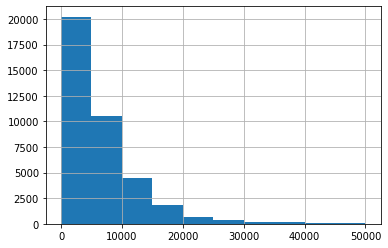

In [123]:
price = df['price_usd']
price.hist()

#### Transformaciones: 

##### Transformación por TanH

In [124]:
p= 10000
transformado =price.apply(lambda x: np.tanh(x/p))

###### Escalado por Max-Min:
Una vez transformado se procede a realizar el Escalado lineal para dejarlo en el rando de -1 a 1.

In [125]:
max_price = max(transformado)
min_price = min(transformado)
maxmin_formula = (2*transformado - max_price - min_price)/(max_price - min_price)

###### Graficado:
En las graficas se evidencia que los datos originales eran fuertemente sesgados, despues de la transformación se obtuvo una distribución uniforme entre 0 y 1; y luego del escalado se obtuvo una distribución uniforme entre -1 y 1

Text(0.5, 1.0, 'Max-Min por formula')

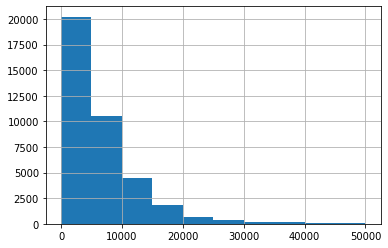

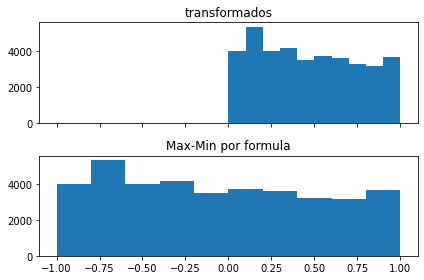

In [126]:
price.hist()
fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)

axs[0].hist(transformado)
axs[0].set_title("transformados")
axs[1].hist(maxmin_formula)
axs[1].set_title("Max-Min por formula")